<h2 style="text-align:center;">Welcome to the fourth laboratory work in this course</h2>
<h4 style="text-align:center;">This laboratory work is graded</h4>

<span style="color:#011f4b; font-size:15px"><b>The goal</b> of the laboratory work - is to start data preprocessing process 
<br/>
<b>Learning outcomes:</b>
* to be able to explore data distributions
* to handle missing values
</span>
<br/><br/>
<span style="color:#011f4b;">
Your task is to complete this laboratory work within 80 minutes and submit the .ipynb file to DL "Laboratory03". 
<br/>
<b>Pay attention to the file name - your file should be named as "Laboratory_work_04_Yoursurname_YourName_yourgroup".</b> In case you didn't name your file properly (as showed before) <b>-5% penalty</b> will be applied.
</span>

<hr>

<span style="color:#011f4b">Because data is often taken from multiple sources which are normally not too reliable and that too in different formats, more than half our time is consumed in dealing with data quality issues when working on a machine learning problem. It is simply unrealistic to expect that the data will be perfect. There may be problems due to human error, limitations of measuring devices, or flaws in the data collection process.

<span style="color:#011f4b"><b> <b><span style="font-size:20px; color:orange">T</span>his laboratory class is focused on your individual work</b>. So you will not be provided with examples, almost.
    <span style="color:#00a0e5"> Данная лабораторная работа более самостоятельная</span>
<br/><br/>
Now, let's go to practice </span>

<b>First things first,</b> import <code><b>matplotlib</b></code>, <code><b>pandas</b></code> and <code><b>numpy</b></code>packages to your notebook. 
<br/> Simply uncomment the cell below:

<p style="text-align:right; color:#1460AA;">+2
    points </p>

In [5]:
# Run this cell - Запустите эту ячейку SHFT+Enter
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

<b>Inline</b> your matplotlib

In [6]:
#Run this cell - Запустите эти ячейки SHFT+Enter
%matplotlib inline

<p style="text-align:right; color:#1460AA;">+2
    points </p>

In [7]:
# Run this cell - Запустите эти ячейки SHFT+Enter
dataset = pd.read_csv("House_prices.csv")
dataset.head(10)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,Neighborhood,HouseStyle,OverallQual,...,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,BedroomAbvGr,KitchenAbvGr,PoolArea,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,CollgCr,2Story,7,...,Ex,Y,SBrkr,856,854,3,1,0,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,Veenker,1Story,6,...,Ex,Y,SBrkr,1262,0,3,1,0,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,CollgCr,2Story,7,...,Ex,Y,SBrkr,920,866,3,1,0,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Crawfor,2Story,7,...,Gd,Y,SBrkr,961,756,3,1,0,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,NoRidge,2Story,8,...,Ex,Y,SBrkr,1145,1053,4,1,0,Normal,250000
5,50,RL,14115,Pave,IR1,Lvl,AllPub,Mitchel,1.5Fin,5,...,Ex,Y,SBrkr,796,566,1,1,0,Normal,143000
6,20,RL,10084,Pave,Reg,Lvl,AllPub,Somerst,1Story,8,...,Ex,Y,SBrkr,1694,0,3,1,0,Normal,307000
7,60,RL,10382,Pave,IR1,Lvl,AllPub,NWAmes,2Story,7,...,Ex,Y,SBrkr,1107,983,3,1,0,Normal,200000
8,50,RM,6120,Pave,Reg,Lvl,AllPub,OldTown,1.5Fin,7,...,Gd,Y,FuseF,1022,752,2,2,0,Abnorml,129900
9,190,RL,7420,Pave,Reg,Lvl,AllPub,BrkSide,1.5Unf,5,...,Ex,Y,SBrkr,1077,0,2,2,0,Normal,118000


So, here we see that you will work with dataset about House Prices and conditions. (<span style="color:#00a0e5">Сегодня вы работаете с данными о продаже домов и их состояния а момент продажи</span>)

Here, you can see the description for this dataset (<span style="color:#00a0e5">Для понимания здесь вы найдете описание фич</span>)

* SalePrice: the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotArea: Lot size in square feet
* Street: Type of road access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* Neighborhood: Physical locations within Ames city limits
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* ExterQual: Exterior material quality
* Foundation: Type of foundation
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* BedroomAbvGr: Number of bedrooms above garage
* KitchenAbvGr: Number of kitchens above garage
* PoolArea: Pool area in square feet
* SaleCondition: Condition of sale

<h3>TASK 1: Data observation </h3>

<b>Task 1.1 </b> Take a closer look to your column values. Use <code>dataset.info()</code> (<span style="color:#00a0e5"> Самое время понять с какими данными вы будете работать, используйте указанные методы чтобы иметь общее представление о данных.</span>)

<p style="text-align:right; color:#1460AA;">+10
    points </p>

In [8]:
# Your code goes here
dataset = pd.read_csv("House_prices.csv")
dataset.info

<bound method DataFrame.info of       MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
0             60       RL     8450   Pave      Reg         Lvl    AllPub   
1             20       RL     9600   Pave      Reg         Lvl    AllPub   
2             60       RL    11250   Pave      IR1         Lvl    AllPub   
3             70       RL     9550   Pave      IR1         Lvl    AllPub   
4             60       RL    14260   Pave      IR1         Lvl    AllPub   
...          ...      ...      ...    ...      ...         ...       ...   
1455          60       RL     7917   Pave      Reg         Lvl    AllPub   
1456          20       RL    13175   Pave      Reg         Lvl    AllPub   
1457          70       RL     9042   Pave      Reg         Lvl    AllPub   
1458          20       RL     9717   Pave      Reg         Lvl    AllPub   
1459          20       RL     9937   Pave      Reg         Lvl    AllPub   

     Neighborhood HouseStyle  OverallQual  ...  Heating

Output exceeds the size limit. Open the full output data in a text editor
<bound method DataFrame.info of       MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
0             60       RL     8450   Pave      Reg         Lvl    AllPub   
1             20       RL     9600   Pave      Reg         Lvl    AllPub   
2             60       RL    11250   Pave      IR1         Lvl    AllPub   
3             70       RL     9550   Pave      IR1         Lvl    AllPub   
4             60       RL    14260   Pave      IR1         Lvl    AllPub   
...          ...      ...      ...    ...      ...         ...       ...   
1455          60       RL     7917   Pave      Reg         Lvl    AllPub   
1456          20       RL    13175   Pave      Reg         Lvl    AllPub   
1457          70       RL     9042   Pave      Reg         Lvl    AllPub   
1458          20       RL     9717   Pave      Reg         Lvl    AllPub   
1459          20       RL     9937   Pave      Reg         Lvl    AllPub 

     Neighborhood HouseStyle  OverallQual  ...  HeatingQC  CentralAir  \
0         CollgCr     2Story            7  ...         Ex           Y   
1         Veenker     1Story            6  ...         Ex           Y   
2         CollgCr     2Story            7  ...         Ex           Y   
3         Crawfor     2Story            7  ...         Gd           Y   
4         NoRidge     2Story            8  ...         Ex           Y   
...           ...        ...          ...  ...        ...         ...   
1455      Gilbert     2Story            6  ...         Ex           Y   
1456       NWAmes     1Story            6  ...         TA           Y   
1457      Crawfor     2Story            7  ...         Ex           Y   
1458        NAmes     1Story            5  ...         Gd           Y   
1459      Edwards     1Story            5  ...         Gd           Y   
...
1457        Normal    266500  
1458        Normal    142125  
1459        Normal    147500  

[1460 rows x 29 columns]>

<b> Task 1.2</b> Differentate categorical and numerical values as <code>data_cat</code> and <code>data_num</code> 
 (<span style="color:#00a0e5"> Разделите ваши категориальные и числовые данные на два датафрейма - <code>data_cat</code> и <code>data_num</code> .</span>)

<p style="text-align:right; color:#1460AA;">+6
    points </p>

In [11]:
# Your code goes here
data = pd.read_csv("House_prices.csv")

In [12]:
# Your code goes here
data_num = data.select_dtypes(include='number')
data_num

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,2ndFlrSF,BedroomAbvGr,KitchenAbvGr,PoolArea,SalePrice
0,60,8450,7,5,2003,2003,856,856,854,3,1,0,208500
1,20,9600,6,8,1976,1976,1262,1262,0,3,1,0,181500
2,60,11250,7,5,2001,2002,920,920,866,3,1,0,223500
3,70,9550,7,5,1915,1970,756,961,756,3,1,0,140000
4,60,14260,8,5,2000,2000,1145,1145,1053,4,1,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,953,953,694,3,1,0,175000
1456,20,13175,6,6,1978,1988,1542,2073,0,3,1,0,210000
1457,70,9042,7,9,1941,2006,1152,1188,1152,4,1,0,266500
1458,20,9717,5,6,1950,1996,1078,1078,0,2,1,0,142125


In [13]:
# Your code goes here
data_cat = data.select_dtypes(include='category')
data_cat

""
0
1
2
3
4
...
1455
1456
1457
1458


<b>Awesome</b>, now you can perform some observation over your dataframe
<br/> 

<b> Task 1.3 </b> Identify if you have any NaNs (<span style="color:#00a0e5"> Определите есть ли у вас пропущенные данные в столбцах.</span>)

NaN (nan, NAN) - stand for not-a-number, in pandas dataframe NaN means that the value was missing (absent).  (<span style="color:#00a0e5"> NaN - это не-число, в даатфрейме пандас если вы встречаете NaN - значит в файле откуда вы считали данных - запись отсутствовала для данной ячейки - т.е. это пропущенное (пустое) значение.</span>)

<p style="text-align:right; color:#1460AA;">+5
    points </p>

In [14]:
# Your code goes here
data = pd.read_csv("House_prices.csv")

def random_nans(data):
    data1 = data.copy()
    for i in range(np.random.randint(90)):
        data1.iloc[np.random.randint(365),np.random.randint(2,7)] = np.NaN
    return data1

data.isnull().sum()

MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
Neighborhood     0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
ExterQual        0
Foundation       0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       1
1stFlrSF         0
2ndFlrSF         0
BedroomAbvGr     0
KitchenAbvGr     0
PoolArea         0
SaleCondition    0
SalePrice        0
dtype: int64

<b>Task 1.4</b> Check unique values for categorical columns and ranges for numerical columns.  (<span style="color:#00a0e5"> Определите уникальные значение для категориальных данных и диапазон данных для числовых</span>)

<p style="text-align:right; color:#1460AA;">+10
    points </p>

In [12]:
# Your code goes here
data = pd.read_csv("House_prices.csv")

In [16]:
# Your code goes here
data_cat = data.select_dtypes(include='category')
data_cat.nunique()

Series([], dtype: float64)

In [17]:
# Your code goes here
data_num = data.select_dtypes(include='number')
data_num.nunique()

MSSubClass        15
LotArea         1073
OverallQual       10
OverallCond        9
YearBuilt        112
YearRemodAdd      61
TotalBsmtSF      721
1stFlrSF         753
2ndFlrSF         417
BedroomAbvGr       8
KitchenAbvGr       4
PoolArea           8
SalePrice        663
dtype: int64

Awesome, now you have some understanding what is the data about.  (<span style="color:#00a0e5"> Класс, теперь у вас есть общее понимание - о чем ваши данные и какие значения они могут принимать.</span>)

<h3> Data preparation </h3

<b>Task 2.1</b> Explore the means, medians - if needed, modes for numerical data.  (<span style="color:#00a0e5"> Посмотрите какие средние значения, мода, медиана для числовых данных.</span>)

<p style="text-align:right; color:#1460AA;">+5
    points </p>

In [18]:
# Your code goes here
import statistics as stat
data = pd.read_csv("House_prices.csv")
modeSubClass = stat.mode(data["MSSubClass"])
modeSubClass

20

In [19]:
# Your code goes here
meanSubClass = stat.mean(data["MSSubClass"])
meanSubClass

56.897260273972606

In [20]:
# Your code goes here
medianSubClass = stat.median(data["MSSubClass"])
medianSubClass

50.0

<b> Task 2.1.1</b> Create a histogram for numerical data - you can use <code>matplotlib</code> or <code>.plot</code> function of pandas  (<span style="color:#00a0e5"> Постройте гистограмму для числовых данных - вы можете использовать matplotlib или .plot функцию от пандас</span>)

<p style="text-align:right; color:#1460AA;">+10
    points </p>

Example,

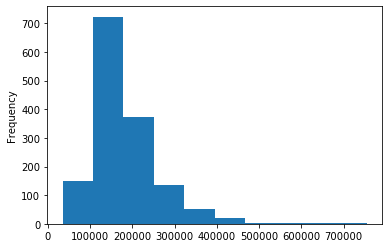

In [24]:
dataset.SalePrice.plot(kind = 'hist')

<Axes: ylabel='Frequency'>

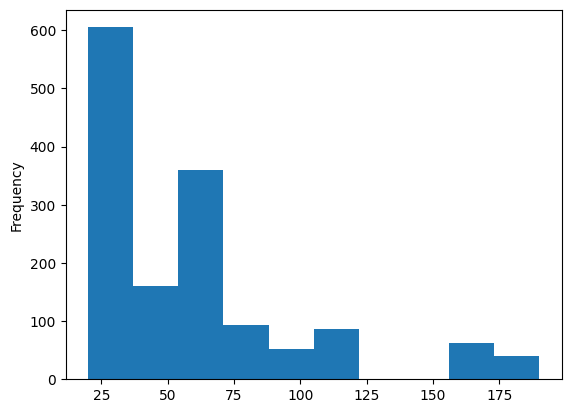

In [21]:
# Your code goes here
data = pd.read_csv("House_prices.csv")

data.MSSubClass.plot(kind = 'hist')

<Axes: ylabel='Frequency'>

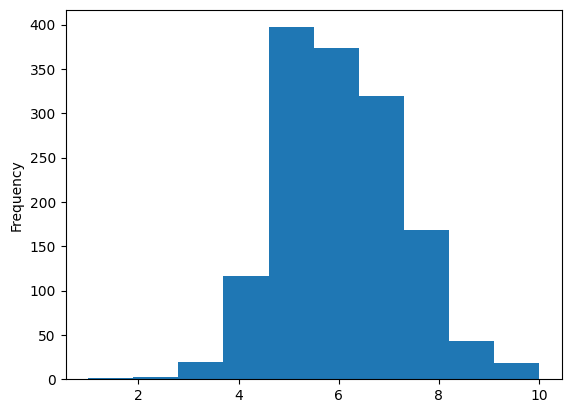

In [22]:
# Your code goes here
data.OverallQual.plot(kind = 'hist')

<Axes: ylabel='Frequency'>

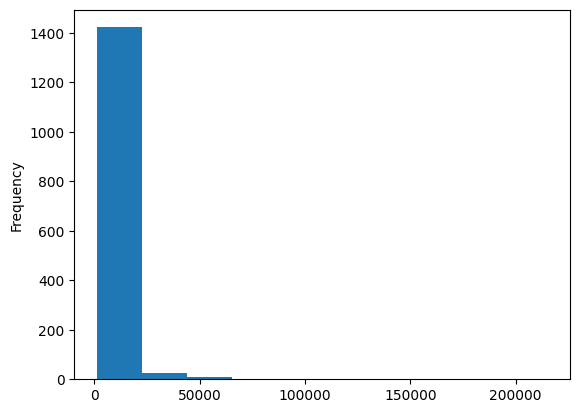

In [23]:
# Your code goes here
data.LotArea.plot(kind = 'hist')


<b>Task 2.2</b> Explain what is the shape of your data, what distribution does it look like?
 (<span style="color:#00a0e5"> Опишите форму ваших данных, к какому распределению она подходит?</span>)

<p style="text-align:right; color:#1460AA;">+10
    points </p>

# Your answer goes here
My fist data distribution shows a mountain formed shape where it grow from 4.5 and falls down to 10

# Your answer goes here
My second data distribution on the histogram shows a sharp drop in frequency from 0 to 50000.

<b>TASK 3</b> Visualizations

<b>Task 3.1</b> Visualize your categorical features and wrire down the summary (<span style="color:#00a0e5"> Визуализируйте ваши категориальные данные, напишите выводы по визуализациям</span>)

<p style="text-align:right; color:#1460AA;">+20
    points </p>

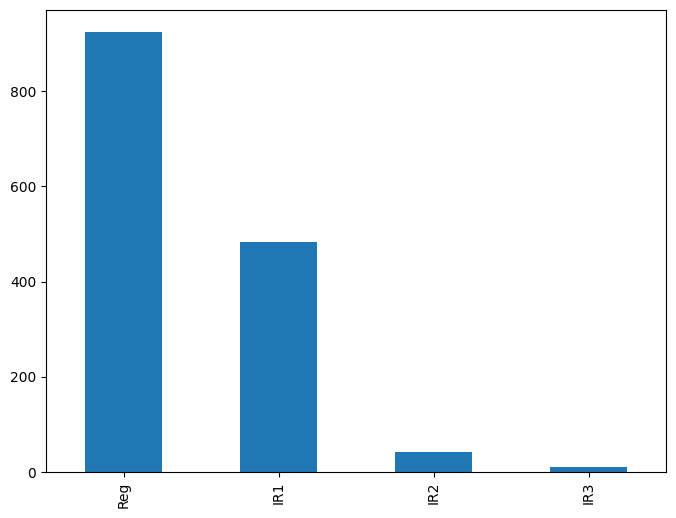

In [24]:
# Your code goes here
data = pd.read_csv("House_prices.csv")
data['LotShape'].value_counts().plot(kind='bar',figsize=(8, 6))
plt.show()

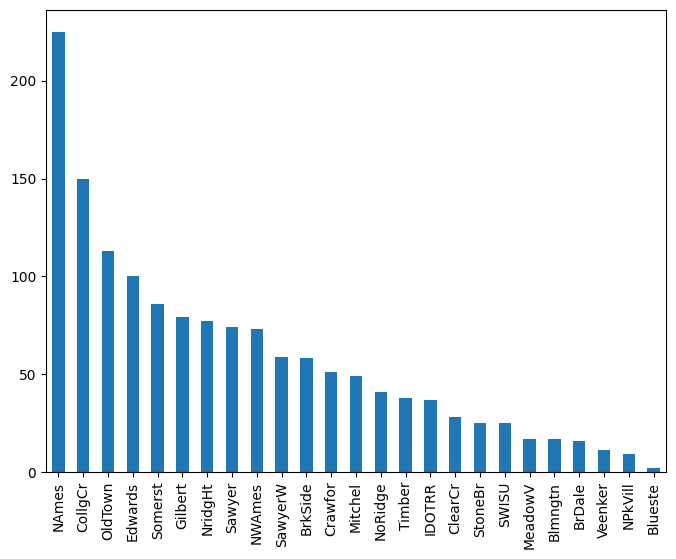

In [25]:
# Your code goes here
data = pd.read_csv("House_prices.csv")
data['Neighborhood'].value_counts().plot(kind='bar',figsize=(8, 6))
plt.show()

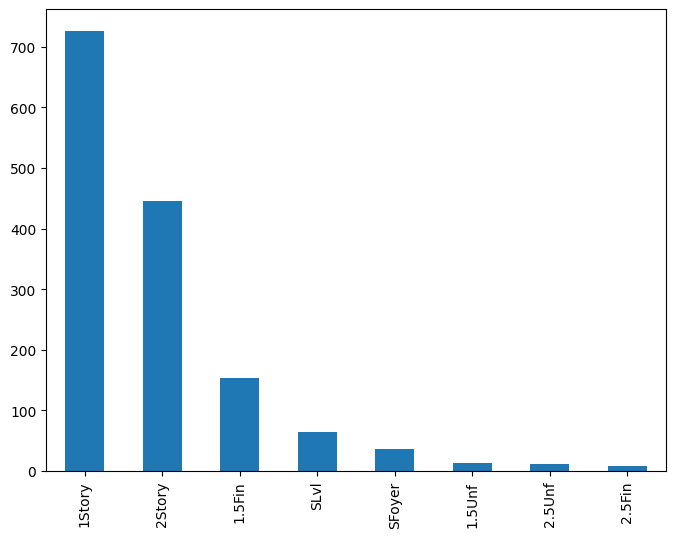

In [26]:
# Your code goes here
data = pd.read_csv("House_prices.csv")
data['HouseStyle'].value_counts().plot(kind='bar',figsize=(8, 6))
plt.show()

My first visualisation shows a column "LotShape" it is slowly raising down from Reg to IR3

My second visualisation shows a column "Neighborhood" it looks alike with the first one also raising down from NAmes to Blueste, but it has some errors.

My third visualisation shows a column "HouseStyle" also decreases by histogram from 1Story to 2.5Fin

<b> Task 3.2 </b> Create boxplots for any 5 numerical features and investigate if there are possible outliers

<p style="text-align:right; color:#1460AA;">+20
    points </p>

Example, 

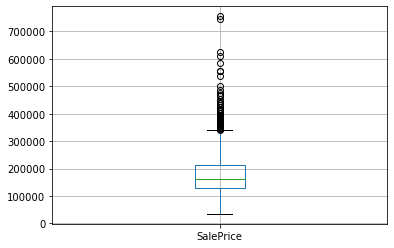

In [30]:
dataset.boxplot('SalePrice')

<Axes: >

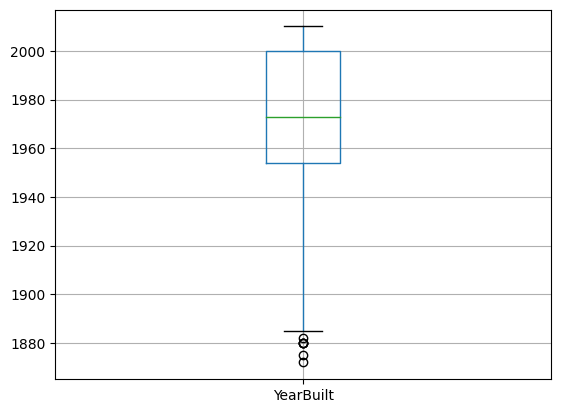

In [33]:
# Your code goes here
df.boxplot('YearBuilt')

<Axes: >

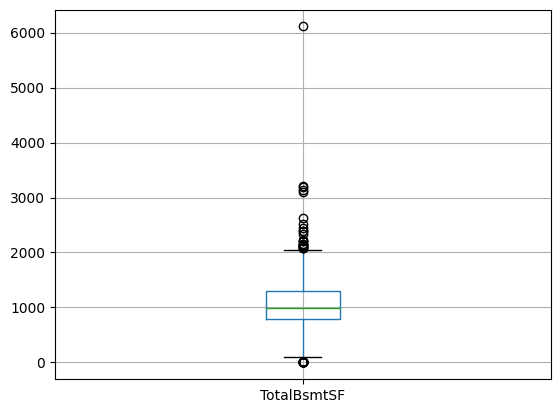

In [32]:
# Your code goes here
data.boxplot('TotalBsmtSF')

<Axes: >

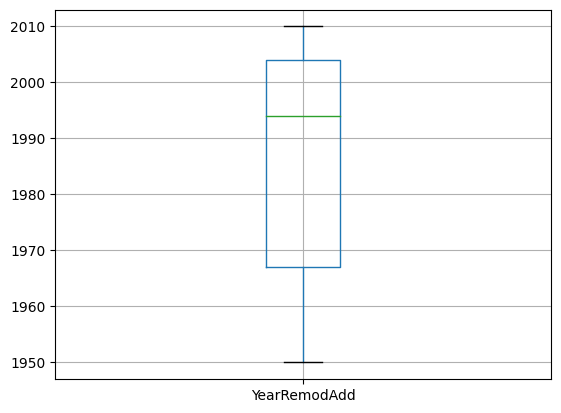

In [35]:
# Your code goes here
data.boxplot('YearRemodAdd')

<b><span style="font-size:20px; color:orange">G</span>reat!</b> You did awesome job! <br/> <br/> But don't stop practicing, remember - since you will be working with data, you have to understand its nature.
<br/> <br/> <b>Now</b> go to the Quiz 04
<br/> 